# University of Chicago Assignment 5 Exploring Decision Tree Regressor

In [4]:
path = r"C:\Users\gauth\Desktop\PGPDM\decisiontrees"

Importing a series of packages

In [46]:
import pandas as pd 
import numpy as np 
import math as m
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#to randomly split data into train and test
from sklearn.model_selection import train_test_split
#Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve,auc,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.tree import export_graphviz
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error
import pydotplus
import graphviz
%matplotlib inline 

Setting seed. This helps us to replicate the same output during multiple runs further down the code wherever random sampling happens

In [39]:
seed = 45

In [40]:
df = pd.read_csv(path+"\\petrol_consumption.csv")

In [8]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [137]:
for i in df.columns:
    print(i,skew(df[i]))

Petrol_tax 0.07597360698644973
Average_income 0.1008201421211541
Paved_Highways 1.164772608126722
Population_Driver_licence(%) 0.6305235417311281


Just checking skewness to see what kind of distribution the variables have 

In [41]:
x= df.drop('Petrol_Consumption',axis=1)
y = df.pop('Petrol_Consumption')
x.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


Creating test train split of the data

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=seed)
print (xtrain.shape, ytrain.shape)
print (xtest.shape, ytest.shape)

(38, 4) (38,)
(10, 4) (10,)


In [43]:
tree = DecisionTreeRegressor(random_state=seed)
tree.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')

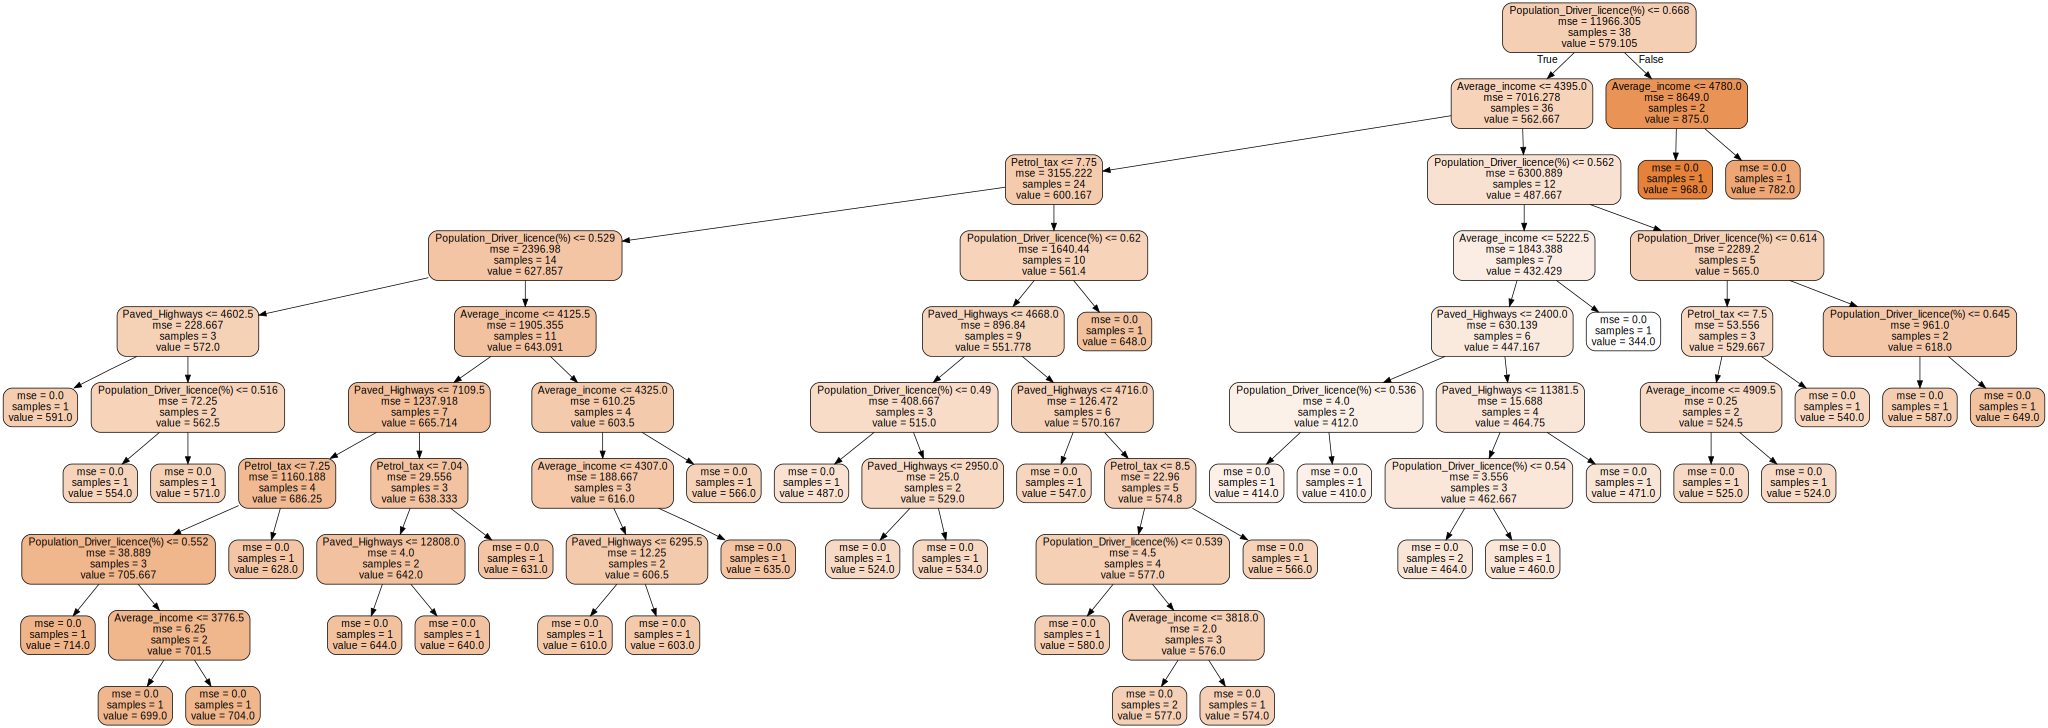

In [47]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=xtest.columns, out_file=None)
graphviz.Source(dot_data)

The cost function here is mse. This would use the mean of Petrol_Consumption at the various leaf_nodes  and the actual Petrol_Consumption values. Then, it finds their difference and squares it to calculate mean square error at every node and then use the variable with the lowest mean squared error, which inturn would be the variable that best helps in predicting the outcome

In [48]:
predictions = tree.predict(xtest)

In [49]:
print("Mean absolute error", mean_absolute_error(ytest, predictions))
print("Mean squared error", mean_squared_error(ytest, predictions))
print("R2 score",r2_score(ytest, predictions))

Mean absolute error 81.0
Mean squared error 14184.2
R2 score -0.0692717611149094


Why is R2 negative? 

Let's see how R2 is calculated.

In [50]:
pred_act = pd.DataFrame({'predictions':predictions,'actual':ytest},columns=["predictions","actual"])

pred_act["error"] =pred_act.predictions - pred_act.actual
pred_act["error2"] =pred_act["error"] * pred_act["error"]
pred_act["mean"] = pred_act.actual.mean()
pred_act["meandifference"] = pred_act["mean"] - pred_act.actual
pred_act["meandifference2"] = pred_act["meandifference"] * pred_act["meandifference"]
pred_act["predDifference"] =pred_act.predictions - pred_act["mean"]
pred_act["predDifference2"] =pred_act["predDifference"] * pred_act["predDifference"]

print("SSE : ",pred_act["error2"].sum())
print("SSR : ",pred_act["predDifference2"].sum())
print("SSTotal : ",pred_act["meandifference2"].sum())

print("SSR/SST : ", pred_act["predDifference2"].sum()/pred_act["meandifference2"].sum())

print("1- SSE/SST : ",1 - (pred_act["error2"].sum()/pred_act["meandifference2"].sum()))

SSE :  141842.0
SSR :  365150.5
SSTotal :  132652.90000000002
SSR/SST :  2.7526763455604812
1- SSE/SST :  -0.0692717611149094


It turns out that R2 can be calculated in two ways. SSR/SST or 1 - SSE/SST.Both 
these options should yield that same value, provided the regression line 
predicts better than mean. But in this case, the prediction is so bad that 
SSE is higher than SST, meaning the regression line residuals are greater than
difference between points and the mean.

I am assuming the r2score function uses 1- SSE/SST, and therefore the R2 is -ve.

Below I will be using gridsearch to tune the hyperparameters to see if leads
to increase in R2 and decrease in error

In [51]:
param_grid = [{"max_depth":[3, 4, 5, None], "max_features":[1,2,3,4],"min_samples_split":[10,50,100]}]

In [91]:
gs = GridSearchCV(estimator=tree,\
                 param_grid = param_grid,\
                 cv=3)

Actually, testing for cv more than 3 is actually reducing accuracy, perhaps because the dataset itself is small and cutting in down to more than 3 splits will considerably reduce the number of samples in the dataset. It is also 
reducing the maximum features to use to 1 from 4. So sticking to cv=3

In [92]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, None], 'max_features': [1, 2, 3, 4], 'min_samples_split': [10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
gs.best_params_

{'max_depth': 3, 'max_features': 4, 'min_samples_split': 10}

Cutting the depth to 3, with all the features included seems to be the best model 
grid search has come up with. There will be 2^3 = 8 leaf nodes at max in this 
decision tree. Considering there are only four variables, this is not a big suprise

In [95]:
final_model = gs.best_estimator_
print(final_model)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')


In [96]:
final_model.fit(xtrain,ytrain)
predictions = final_model.predict(xtest)

In [98]:
print("Mean absolute error", mean_absolute_error(ytest, predictions))
print("Mean squared error", mean_squared_error(ytest, predictions))
print("R2 score",r2_score(ytest, predictions))

Mean absolute error 65.2942857142857
Mean squared error 9030.801387755102
R2 score 0.31921568335444594


With the tuned parameters, we see that the error has reduced a bit. We are also 
getting a positve R2, which means the error is atleast less than the sum of squares total and is predicting better than just taking the mean of actual average of the target variable

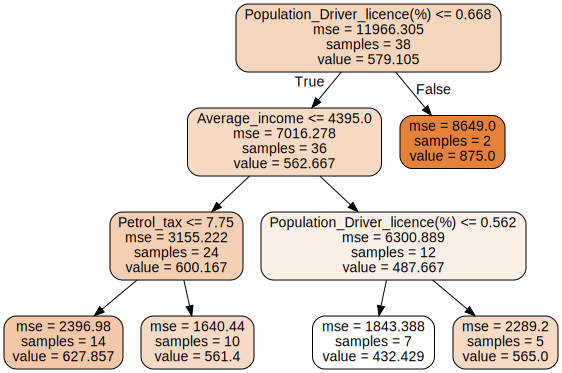

In [99]:
dot_data = export_graphviz(final_model, filled=True, rounded=True, feature_names=xtest.columns, out_file=None)
graphviz.Source(dot_data)

MAx_depth 3 has reduced the number of level to 4 for the entire tree, had we given
more max depths, the tree will continue spitting with a goal to reduce MSE